In [3]:
import numpy as np
import librosa.display as lbd
import matplotlib.pyplot as plt
import librosa as lb
import os as o


In [9]:
# Original = Train(8) + Test(2)
# Cloned = Testing(99) + Train(25) 
path = o.listdir("Testing_set/Cloned")
len(path)

25

In [2]:
def make_spectrogram(input_path,output_path):
    y, sr = lb.load(input_path)
    fig = plt.figure()
    # ax = fig.add_subplot(1,1,1)
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    mel_spectrogram = lb.feature.melspectrogram(y=y,sr=sr,n_fft=2048,hop_length=512)
    mel_spectrogram_db = lb.power_to_db(mel_spectrogram,ref=np.max)
    lbd.specshow(mel_spectrogram_db,sr=sr)
    fig.savefig(output_path)
    plt.close(fig)    

In [3]:
def make_pngs(input_path,output_path):
    
    dir = o.listdir(input_path)
    for file in dir:
        full_path = o.path.join(input_path,file)
        output_file = o.path.join(output_path,file.replace('.wav','.png'))
        make_spectrogram(full_path,output_file)
        print(f"The file with path {full_path} done")
        

In [4]:
input_path = "Training_set/Original"
out = "Training_png/Original"
make_pngs(input_path,out)

The file with path Training_set/Original\0ground_truth.wav done
The file with path Training_set/Original\0speaker2ground_truth.wav done
The file with path Training_set/Original\1ground_truth.wav done
The file with path Training_set/Original\1speaker2ground_truth.wav done
The file with path Training_set/Original\2ground_truth.wav done
The file with path Training_set/Original\2speaker2ground_truth.wav done
The file with path Training_set/Original\3ground_truth.wav done
The file with path Training_set/Original\British_male_2.wav done


In [5]:
input_path = "Training_set/Cloned"
out = "Training_png/Cloned"
make_pngs(input_path,out)

The file with path Training_set/Cloned\0embedadapt_100sample.wav done
The file with path Training_set/Cloned\0embedadapt_10sample.wav done
The file with path Training_set/Cloned\0embedadapt_20sample.wav done
The file with path Training_set/Cloned\0embedadapt_50sample.wav done
The file with path Training_set/Cloned\0embedadapt_5sample.wav done
The file with path Training_set/Cloned\0speaker2embedadapt_100sample.wav done
The file with path Training_set/Cloned\0speaker2embedadapt_10sample.wav done
The file with path Training_set/Cloned\0speaker2embedadapt_20sample.wav done
The file with path Training_set/Cloned\0speaker2embedadapt_50sample.wav done
The file with path Training_set/Cloned\0speaker2embedadapt_5sample.wav done
The file with path Training_set/Cloned\0speaker2wholemodel_100sample.wav done
The file with path Training_set/Cloned\0speaker2wholemodel_10sample.wav done
The file with path Training_set/Cloned\0speaker2wholemodel_20sample.wav done
The file with path Training_set/Cloned

In [6]:
input_path = "Testing_set/Original"
out = "Testing_png/Original"
make_pngs(input_path,out)

The file with path Testing_set/Original\3speaker2ground_truth.wav done
The file with path Testing_set/Original\original_british_male_1.wav done


In [7]:
input_path = "Testing_set/Cloned"
out = "Testing_png/Cloned"
make_pngs(input_path,out)

The file with path Testing_set/Cloned\0embedadapt_1sample.wav done
The file with path Testing_set/Cloned\0speaker2embedadapt_1sample.wav done
The file with path Testing_set/Cloned\0speaker2wholemodel_1sample.wav done
The file with path Testing_set/Cloned\0speaker2withfinetuning_1sample.wav done
The file with path Testing_set/Cloned\0speaker2withoutfinetuning_1sample.wav done
The file with path Testing_set/Cloned\0wholemodel_1sample.wav done
The file with path Testing_set/Cloned\1embedadapt_5sample.wav done
The file with path Testing_set/Cloned\1speaker2embedadapt_5sample.wav done
The file with path Testing_set/Cloned\1speaker2wholemodel_5sample.wav done
The file with path Testing_set/Cloned\1speaker2withfinetuning_5sample.wav done
The file with path Testing_set/Cloned\1speaker2withoutfinetuning_5sample.wav done
The file with path Testing_set/Cloned\1wholemodel_100sample.wav done
The file with path Testing_set/Cloned\2embedadapt_10sample.wav done
The file with path Testing_set/Cloned\2s

In [4]:
from keras.preprocessing import image 

def load_images(path,label):
    images = []
    labels = []
    
    for file in o.listdir(path):
        images.append(image.img_to_array(image.load_img(o.path.join(path,file),target_size=(224,224,3))))
        labels.append(label)
    return images,labels


def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

x_train = []
x_test = []
y_train = []
y_test = []

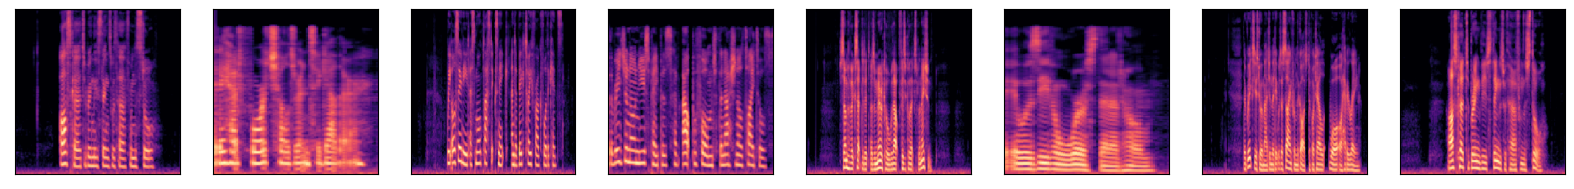

In [5]:
path = "Training_png/Original"
label = 1

images,labels = load_images(path,label)
show_images(images)

x_train += images
y_train += labels

In [13]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[20])
plt.xlabel(y_train[2])

IndexError: list index out of range

<Figure size 1500x200 with 0 Axes>

In [4]:
# len(x_train)
len(y_train)

8

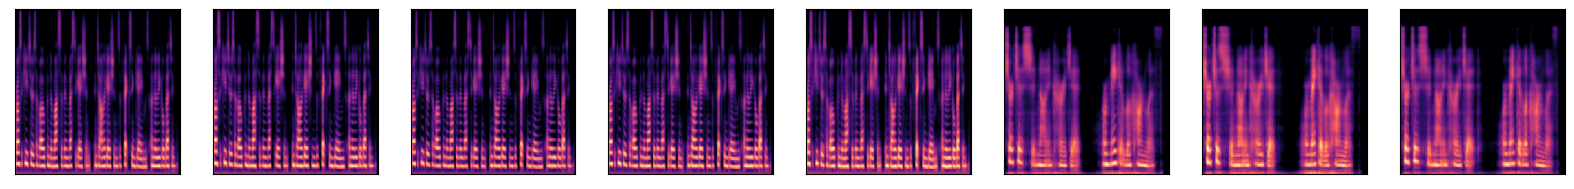

In [6]:
path = "Training_png/Cloned"
label = 0
images,labels = load_images(path,label)
show_images(images)

x_train += images
y_train += labels

In [8]:
import cv2 as cv

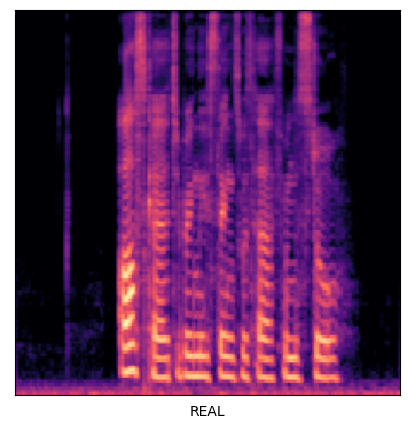

In [7]:

plt.figure(figsize=(20,5))
plt.imshow(x_train[0]/255)
plt.xticks([]) 
plt.yticks([])
if y_train[0]==False:
    plt.xlabel("FAKE")
else:
    plt.xlabel("REAL")

In [8]:
path = "Testing_png/Original"
label = 1
images,labels = load_images(path,label)

x_test += images
y_test += labels


In [9]:
len(y_test)


2

In [10]:
path = "Testing_png/Cloned"
label = 0
images,labels = load_images(path,label)

x_test += images
y_test += labels

In [11]:
len(y_test)

27

In [12]:
from keras.utils import to_categorical

x_train_norm = np.array(x_train)/255
x_test_norm = np.array(x_test)/255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,BatchNormalization
from keras.layers import Flatten,Dense,Dropout
from keras.initializers import glorot_uniform


Convolution Layer

In [14]:
def custom():
    cnn = Sequential()
    cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
    cnn.add(MaxPooling2D(2,2))
    cnn.add(Conv2D(128,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(2,2))
    cnn.add(Conv2D(128,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(2,2))
    cnn.add(Conv2D(128,(3,3),activation='relu'))
    cnn.add(MaxPooling2D(2,2))
    cnn.add(Flatten())
    cnn.add(Dense(512,activation='relu'))
    cnn.add(Dense(2,activation='softmax'))
    return cnn
# cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# cnn.summary()

In [15]:
cnn = custom()
cnn.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [16]:
model = cnn.fit(x_train_norm,y_train_encoded,batch_size=16,epochs=10)

Epoch 1/10
7/7 [==============================] - 4s 476ms/step - loss: 0.6700 - accuracy: 0.9252
Epoch 2/10
7/7 [==============================] - 3s 479ms/step - loss: 0.6544 - accuracy: 0.9252
Epoch 3/10
7/7 [==============================] - 3s 480ms/step - loss: 0.6386 - accuracy: 0.9252
Epoch 4/10
7/7 [==============================] - 3s 483ms/step - loss: 0.6231 - accuracy: 0.9252
Epoch 5/10
7/7 [==============================] - 3s 494ms/step - loss: 0.6075 - accuracy: 0.9252
Epoch 6/10
7/7 [==============================] - 4s 506ms/step - loss: 0.5918 - accuracy: 0.9252
Epoch 7/10
7/7 [==============================] - 4s 509ms/step - loss: 0.5763 - accuracy: 0.9252
Epoch 8/10
7/7 [==============================] - 4s 538ms/step - loss: 0.5608 - accuracy: 0.9252
Epoch 9/10
7/7 [==============================] - 4s 531ms/step - loss: 0.5455 - accuracy: 0.9252
Epoch 10/10
7/7 [==============================] - 4s 534ms/step - loss: 0.5299 - accuracy: 0.9252


In [ ]:
def lenet5():
    cnn = Sequential()

    cnn.add(Conv2D(filters=6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=(224,224,3)))
    cnn.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))
    cnn.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='tanh'))
    cnn.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    cnn.add(Flatten())

    cnn.add(Dense(units=120,activation='tanh'))
    cnn.add(Dense(units=84,activation='tanh'))

    cnn.add(Dense(units=2,activation='softmax'))
    return cnn

In [15]:
def alexnet():
    model = Sequential()
    model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=(224,224,3)))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Second Convolutional Layer
    model.add(Conv2D(256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Third Convolutional Layer
    model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())

    # Fourth Convolutional Layer
    model.add(Conv2D(384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(BatchNormalization())

    # Fifth Convolutional Layer
    model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Flatten the convolutional layers output for fully connected layers
    model.add(Flatten())

    # First Fully Connected Layer
    model.add(Dense(4096, activation='relu', kernel_initializer=glorot_uniform(seed=0)))
    model.add(Dropout(0.5))

    # Second Fully Connected Layer
    model.add(Dense(4096, activation='relu', kernel_initializer=glorot_uniform(seed=0)))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(2, activation='softmax'))

    return model

In [18]:
def vggnet():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    return model


In [19]:
vgg = vggnet()
vgg.compile(optimizer='adadelta',loss='categorical_crossentropy',metrics=['accuracy'])
vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

In [20]:
vgg.fit(x_train_norm,y_train_encoded,batch_size=32,epochs=10)

Epoch 1/10
4/4 [==============================] - 38s 9s/step - loss: 0.6926 - accuracy: 0.9252
Epoch 2/10
4/4 [==============================] - 39s 9s/step - loss: 0.6922 - accuracy: 0.9252
Epoch 3/10
2/4 [==============>...............] - ETA: 24s - loss: 0.6920 - accuracy: 0.9062

KeyboardInterrupt: 

In [16]:
alex = alexnet()
alex.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
alex.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 26, 26, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                      

In [17]:
modelalex = alex.fit(x_train_norm,y_train_encoded,batch_size=32,epochs=10)

Epoch 1/10
4/4 [==============================] - 5s 781ms/step - loss: 3.5764 - accuracy: 0.7664
Epoch 2/10
4/4 [==============================] - 3s 790ms/step - loss: 1.1136 - accuracy: 0.9626
Epoch 3/10
4/4 [==============================] - 3s 799ms/step - loss: 0.3307 - accuracy: 0.9907
Epoch 4/10
4/4 [==============================] - 3s 809ms/step - loss: 1.7006 - accuracy: 0.9533
Epoch 5/10
4/4 [==============================] - 3s 832ms/step - loss: 0.1518 - accuracy: 0.9813
Epoch 6/10
4/4 [==============================] - 4s 863ms/step - loss: 0.6481 - accuracy: 0.9813
Epoch 7/10
4/4 [==============================] - 4s 895ms/step - loss: 0.9255 - accuracy: 0.9720
Epoch 8/10
4/4 [==============================] - 4s 914ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 4s 939ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 4s 962ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [16]:
import numpy as np
from keras.preprocessing import image
def test_image(path,cnn):
    test_image = image.load_img(path,target_size=(224,224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis=0)

    result = cnn.predict(test_image)
    print(result)

In [14]:
path="Testing_png/Original/3speaker2ground_truth.png"
test_image(path,vgg)


1/1 [==============================] - 0s 201ms/step
[[0.92329836 0.0767016 ]]


In [19]:
path="Testing_png/Cloned/0embedadapt_1sample.png"
test_image(path,cnn)

1/1 [==============================] - 0s 82ms/step
[[1. 0.]]
